In [1]:
# First XGBoost model for Pima Indians dataset
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = np.loadtxt("D:/New Docs/Learning/ML/XG Boost/XGBoost with Python mini course/pima-indian-diabetes.csv", delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 74.02%


In [2]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [3]:
print("shape X:", np.shape(X), "shape Y:", np.shape(Y))

shape X: (768, 8) shape Y: (768,)


In [38]:
#Assigning the evaluation set data and adding the evaluation metric and setting an early stop
eval_set = [(X_train, y_train),(X_test, y_test)]
model.set_params(early_stopping_rounds=20, eval_metric="logloss")
# fit model on training data
model.fit(X_train, y_train,
eval_set=eval_set, verbose=True) 
# make predictions for test data
y_predictions = model.predict(X_test) 
# evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.55257	validation_1-logloss:0.60491
[1]	validation_0-logloss:0.46754	validation_1-logloss:0.55934
[2]	validation_0-logloss:0.40734	validation_1-logloss:0.53068
[3]	validation_0-logloss:0.36480	validation_1-logloss:0.51795
[4]	validation_0-logloss:0.33012	validation_1-logloss:0.51153
[5]	validation_0-logloss:0.29868	validation_1-logloss:0.50934
[6]	validation_0-logloss:0.27852	validation_1-logloss:0.50818
[7]	validation_0-logloss:0.26182	validation_1-logloss:0.51097
[8]	validation_0-logloss:0.24578	validation_1-logloss:0.51760
[9]	validation_0-logloss:0.23298	validation_1-logloss:0.51912
[10]	validation_0-logloss:0.21955	validation_1-logloss:0.52503
[11]	validation_0-logloss:0.21051	validation_1-logloss:0.52697
[12]	validation_0-logloss:0.20083	validation_1-logloss:0.53335
[13]	validation_0-logloss:0.19466	validation_1-logloss:0.53905
[14]	validation_0-logloss:0.18725	validation_1-logloss:0.54545
[15]	validation_0-logloss:0.17765	validation_1-logloss:0.54613
[1

Best iteration 6


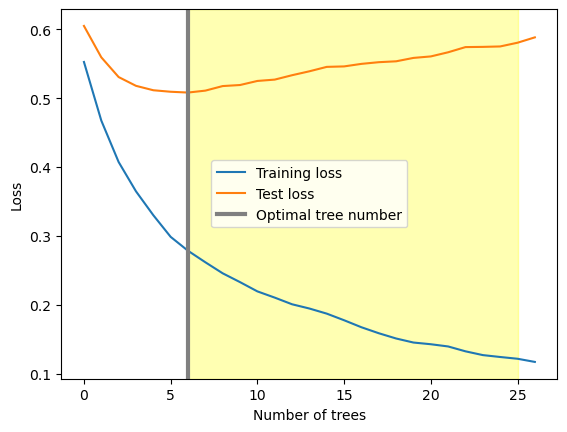

In [40]:
results = model.evals_result() #taking the evalutaion results, what's the shape and data type?

#pyplot.figure(figsize=(10,7)) #assigning size of the figure, width, height in inches, default (6.4, 4.8)
pyplot.plot(results["validation_0"]["logloss"], label="Training loss") #[result][evalmetric]
pyplot.plot(results["validation_1"]["logloss"], label="Test loss") #""
pyplot.axvline(model.best_iteration, color="gray", label="Optimal tree number", linewidth=3) #verticaal line at best iteration from the early stopping method 
pyplot.axvspan(xmin=model.best_iteration, xmax=25, color="yellow", alpha=0.3)#creates a vertical span, alpha is opacity
pyplot.xlabel("Number of trees")
pyplot.ylabel("Loss")
pyplot.legend()
print("Best iteration",model.best_iteration )
#learn about the different eval methods

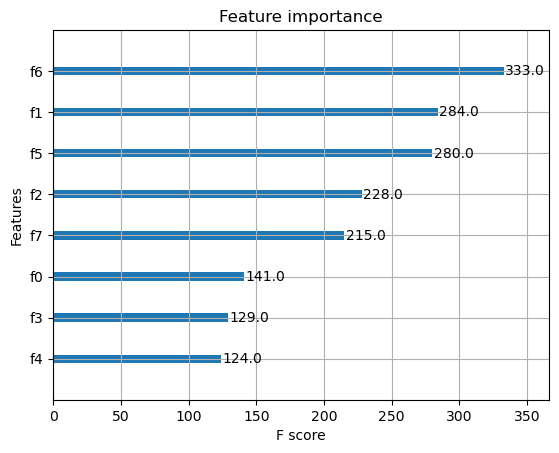

In [7]:
# fit model on training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()


In [ ]:
#can I test what's the optimal number of trees and early stopping iterations?

In [6]:
print("testing 1, 2")

testing 1, 2


In [5]:
import pandas as pd

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [9]:
tf_nn_model = tf.keras.Sequential([
layers.Dense(15),
layers.Dense(10),#I think this means we used linear activation
layers.Dense(5)
])

tf_nn_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [13]:
history = tf_nn_model.fit(X_train, 
                          y_train, 
                          epochs=100,
                         validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 0s 16ms/step - loss: 0.9906 - val_loss: 0.9651
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9634 - val_loss: 0.9317
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9535 - val_loss: 0.9330
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9344 - val_loss: 0.9140
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9271 - val_loss: 0.9007
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9034 - val_loss: 0.8859
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9125 - val_loss: 0.8869
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8866 - val_loss: 0.8708
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8693 - val_loss: 0.8567
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8522 - val_loss: 0.8502
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.3512 - val_loss: 0.3486
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3561 - val_loss: 0.3545
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3512 - val_loss: 0.3431
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3459 - val_loss: 0.3466
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3377 - val_loss: 0.3346
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3365 - val_loss: 0.3492
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3463 - val_loss: 0.3498
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3346 - val_loss: 0.3363
Epoch 91/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3310 - val_loss: 0.3272
Epoch 92/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3247 - val_loss: 0.3263
Epoch 93/100


In [14]:
history.history

{'loss': [0.9906297326087952,
  0.963391900062561,
  0.9534797072410583,
  0.9343872666358948,
  0.9270817041397095,
  0.9033517241477966,
  0.9125128984451294,
  0.8865682482719421,
  0.8692693710327148,
  0.8521771430969238,
  0.8508400321006775,
  0.8325831890106201,
  0.821528971195221,
  0.8095036745071411,
  0.79481041431427,
  0.7873989343643188,
  0.7754702568054199,
  0.7636033296585083,
  0.748362123966217,
  0.7379040122032166,
  0.7292531728744507,
  0.7276420593261719,
  0.7130610346794128,
  0.7002123594284058,
  0.6852449178695679,
  0.6834124326705933,
  0.6751550436019897,
  0.6668698787689209,
  0.6509233713150024,
  0.6448302865028381,
  0.649356484413147,
  0.6357192397117615,
  0.617264449596405,
  0.6348097920417786,
  0.6015027761459351,
  0.590802788734436,
  0.5894491672515869,
  0.5784213542938232,
  0.5734028816223145,
  0.5664063692092896,
  0.5576751232147217,
  0.5574547648429871,
  0.5439310073852539,
  0.5369166731834412,
  0.5378022789955139,
  0.529400

In [16]:
print("Evaluate on test data")
results = tf_nn_model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = tf_nn_model.predict(X_test[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
8/8 [==============================] - 0s 1ms/step - loss: 0.3162
test loss, test acc: 0.3161553740501404
Generate predictions for 3 samples
1/1 [==============================] - 0s 115ms/step
predictions shape: (10, 5)


In [17]:
tf_nn_model1 = tf.keras.Sequential([
layers.Dense(units=15, activation='relu'),
layers.Dense(units=10, activation='relu'),
layers.Dense(units=5, activation='sigmoid')
])

tf_nn_model1.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [18]:
history1 = tf_nn_model1.fit(X_train, 
                          y_train, 
                          epochs=100,
                         validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 0.4314 - val_loss: 0.4087
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3954 - val_loss: 0.4098
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3942 - val_loss: 0.4069
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3860 - val_loss: 0.3756
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3548 - val_loss: 0.3497
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3330 - val_loss: 0.3468
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3240 - val_loss: 0.3323
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3140 - val_loss: 0.3196
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3138 - val_loss: 0.3255
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3097 - val_loss: 0.3142
Epoch 11

17/17 [==============================] - 0s 3ms/step - loss: 0.2540 - val_loss: 0.2683
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2519 - val_loss: 0.2665
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2515 - val_loss: 0.2656
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2513 - val_loss: 0.2667
Epoch 87/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2515 - val_loss: 0.2656
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2507 - val_loss: 0.2674
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2498 - val_loss: 0.2633
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2493 - val_loss: 0.2651
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2487 - val_loss: 0.2627
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2469 - val_loss: 0.2625
Epoch 93/100


In [19]:
print("Evaluate on test data")
results1 = tf_nn_model1.evaluate(X_test, y_test)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions1 = tf_nn_model1.predict(X_test[:10])
print("predictions shape:", predictions.shape)

Evaluate on test data
8/8 [==============================] - 0s 1ms/step - loss: 0.2611
test loss, test acc: 0.2611400783061981
Generate predictions for 10 samples
1/1 [==============================] - 0s 72ms/step
predictions shape: (10, 5)
